# Data Modeling for House Price prediction

Author: Haochen Miao

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import chardet#for encoding
import warnings# to avoid the warnings
warnings.filterwarnings('ignore')
pd.pandas.set_option('display.max_columns',0)

In [2]:
data=pd.read_csv("data/Data_For_Model.csv",index_col=0)
data.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,day,total_sqft,total_sqft15
0,7129300520,-1.219602,-0.360264,-1.474021,-1.024220,-0.368444,-0.882793,0,-0.265547,-0.630613,-0.505274,-0.719609,-0.655898,-0.535113,-0.196675,98178,47.5112,-122.257,-0.939298,-0.289399,-0.690134,1.098833,-0.312788,-0.420250,-0.322666
1,6414100192,0.304766,-0.360264,0.287004,0.789831,-0.250721,0.977186,0,-0.265547,-0.630613,-0.505274,0.657624,0.324808,-0.672027,5.072365,98125,47.7210,-122.319,-0.368044,-0.165201,-0.690134,1.740754,-0.777156,-0.202960,-0.177812
2,5631500400,-1.421662,-1.456021,-1.474021,-1.559300,-0.046776,-0.882793,0,-0.265547,-0.630613,-1.474987,-1.289978,-0.655898,-1.288143,-0.196675,98028,47.7379,-122.233,1.313076,-0.138788,1.448994,-1.468851,1.080317,-0.133154,-0.087827
3,2487200875,0.623046,0.735492,1.343619,-0.006263,-0.416510,-0.882793,0,-0.265547,2.457736,-0.505274,-0.900458,1.575207,-0.192826,-0.196675,98136,47.5208,-122.393,-0.906655,-0.329986,-0.690134,1.740754,-0.777156,-0.410777,-0.361682
4,1954400510,0.169738,-0.360264,-0.065201,-0.371684,-0.188754,-0.882793,0,-0.265547,-0.630613,0.464440,-0.024037,-0.655898,0.560204,-0.196675,98074,47.6168,-122.045,-0.188507,-0.173693,1.448994,-1.468851,0.267672,-0.206750,-0.179422


1. lat

2. grade

3. sqft_living

4. sqft_living15

5. sqft_above

6. yr_built

7. long

8. bathrooms

9. zipcode

10. view

In [3]:
data.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day', 'total_sqft',
       'total_sqft15'],
      dtype='object')

In [4]:
data.drop(columns=['id', 'bedrooms', 'sqft_lot', 'floors', 'waterfront', 'condition',
       'sqft_basement', 'yr_renovated', 'sqft_lot15', 'year', 'month', 'day', 'total_sqft',
       'total_sqft15'],inplace=True,axis=1)

In [5]:
data.shape

(20138, 11)

In [6]:
data.columns

Index(['price', 'bathrooms', 'sqft_living', 'view', 'grade', 'sqft_above',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15'],
      dtype='object')

In [7]:
#input features for model
X=data.drop(['price'],axis=1)
#output features for model
y=data['price']

## KNN Model

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=2)

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()
knn_reg.fit(X_train, y_train)
print("By using Kneighbor regression we got:")
print("Training data accuracy",knn_reg.score(X_train, y_train))
print("Testing data accuracy",knn_reg.score(X_test, y_test))

By using Kneighbor regression we got:
Training data accuracy 0.8799885139437705
Testing data accuracy 0.8185234855088379


### Hyperparameter Tuning

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

In [12]:
# GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']},
             scoring='neg_mean_squared_error')

In [13]:
# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score (RMSE):", np.sqrt(-grid_search.best_score_))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 11, 'weights': 'distance'}
Best cross-validation score (RMSE): 0.41379319949558446


In [14]:
# Train the model using the best parameters found
best_knn = grid_search.best_estimator_

In [15]:
# Predict on test data
y_pred = best_knn.predict(X_test)

### RMSE

In [16]:
# Calculate RMSE for the test set
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Test set RMSE:", test_rmse)

Test set RMSE: 0.4086696131090179


### Mean Absolute Error (MAE)

In [17]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.2840896740518707


### R-squared calculation

In [18]:
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print(f"R-squared: {r_squared}")

R-squared: 0.8334112097210906


### Residual Plots

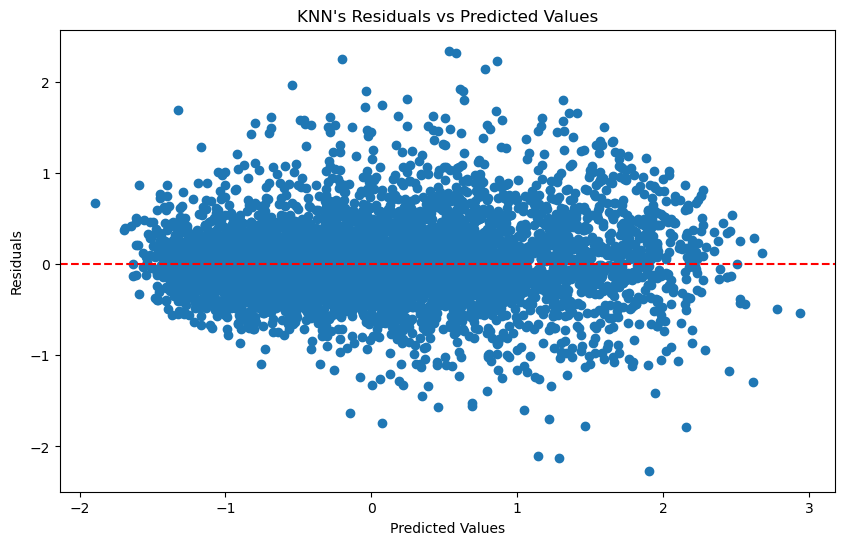

In [19]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title("KNN's Residuals vs Predicted Values")
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

## Decision Tree

In [20]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree Regressor
tree_reg = DecisionTreeRegressor(random_state=42)

# Train the model
tree_reg.fit(X_train, y_train)

print("By using Decision we got:")
print("Training data accuracy",tree_reg.score(X_train, y_train))
print("Testing data accuracy",tree_reg.score(X_test, y_test))

By using Decision we got:
Training data accuracy 0.9981285228938445
Testing data accuracy 0.7308622347820146


### Model Evaluation

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on the test set
y_pred = tree_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 0.5194416631505877
Mean Absolute Error (MAE): 0.36333688437793565
R-squared: 0.7308622347820146


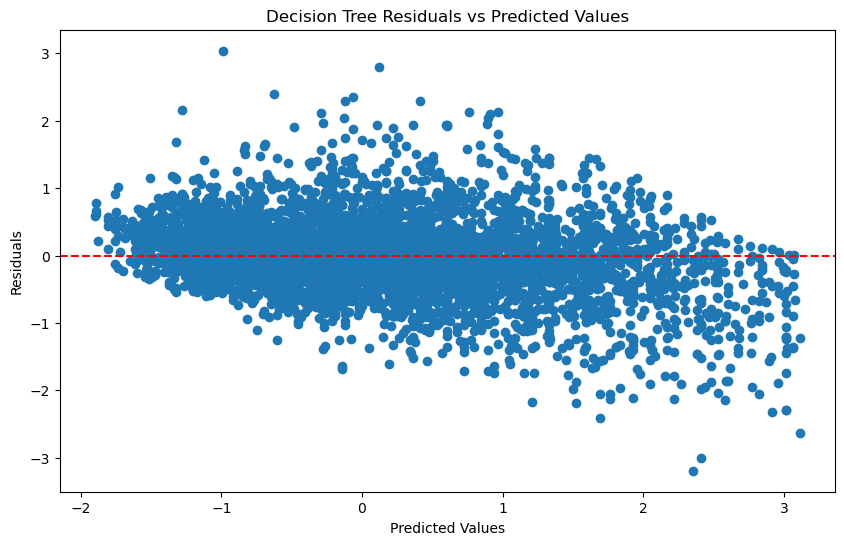

In [22]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Decision Tree Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

## Support Vector Machines (SVM)

In [23]:
from sklearn.svm import SVR

# Initialize the SVM Regressor
svm_reg = SVR(kernel='rbf')  # You can experiment with different kernels like 'linear', 'poly', 'rbf'

# Train the model
svm_reg.fit(X_train_scaled, y_train)

print("By using SVM we got:")
print("Training data accuracy:", svm_reg.score(X_train_scaled, y_train))
print("Testing data accuracy:", svm_reg.score(X_test_scaled, y_test))

By using SVM we got:
Training data accuracy: 0.8466167286168442
Testing data accuracy: 0.8327084221070374


### Model Evaluation

In [24]:
# Predict on the test set
y_pred = svm_reg.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 0.4095307324805643
Mean Absolute Error (MAE): 0.2894160934942112
R-squared: 0.8327084221070374


### Hyperparameter Tuning

In [25]:
param_grid = {
    'C': [1, 10],  
    'gamma': ['scale'],  
    'kernel': ['rbf']
}

In [26]:
grid_search = GridSearchCV(SVR(), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

print("Best parameters:", grid_search.best_params_)
best_svr = grid_search.best_estimator_

Best parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}


In [27]:
# Evaluate the best model
y_pred_best = best_svr.predict(X_test_scaled)
best_rmse = np.sqrt(mean_squared_error(y_test, y_pred_best))
print(f"Best model RMSE: {best_rmse}")

Best model RMSE: 0.4052330145982051


### Residual plot 

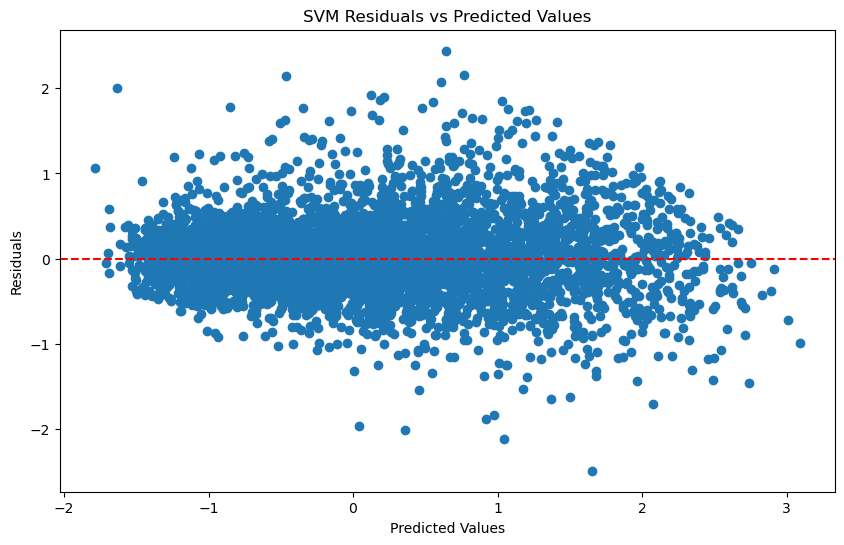

In [28]:
residuals = y_test - y_pred_best

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_best, residuals)
plt.title('SVM Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

## Neural Networks

In [29]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(hidden_layer_sizes=(100,), max_iter=500, random_state=42)
mlp_reg.fit(X_train_scaled, y_train)

print("By using neural networks we got:")
print("Training data accuracy:", mlp_reg.score(X_train_scaled, y_train))
print("Testing data accuracy:", mlp_reg.score(X_test_scaled, y_test))

By using neural networks we got:
Training data accuracy: 0.8676497083939875
Testing data accuracy: 0.8558658662833005


In [30]:
# Predict on the test set
y_pred = mlp_reg.predict(X_test_scaled)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Root Mean Squared Error (RMSE): 0.38013064324866935
Mean Absolute Error (MAE): 0.2745886858463537
R-squared: 0.8558658662833005


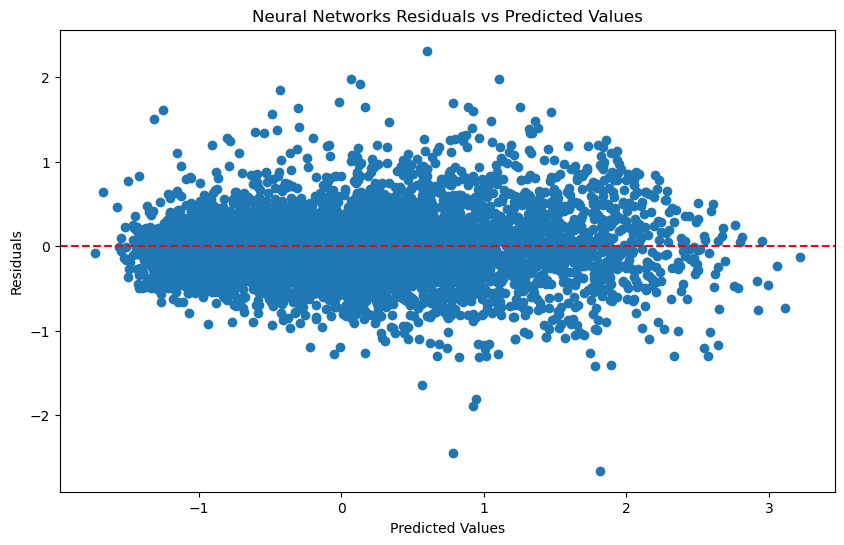

In [31]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Neural Networks Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()


In [32]:
# Define a grid of hyperparameters to tune
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive'],
}

In [ ]:
grid_search = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42) 
grid_search.fit(X_train_scaled, y_train)

MLPRegressor(max_iter=1000, random_state=42)

In [ ]:
# Get the best parameters and the best MLP regressor
print("Best parameters found: ", grid_search.best_params_)
best_mlp_reg = grid_search.best_estimator_

AttributeError: 'MLPRegressor' object has no attribute 'best_params_'

In [ ]:
# Training accuracy
train_accuracy_tuned = best_mlp_reg.score(X_train_scaled, y_train)
print("Training data accuracy (Tuned):", train_accuracy_tuned)

# Testing accuracy
test_accuracy_tuned = best_mlp_reg.score(X_test_scaled, y_test)
print("Testing data accuracy (Tuned):", test_accuracy_tuned)

# Predict on the test set with the tuned model
y_pred_tuned = best_mlp_reg.predict(X_test_scaled)

# Calculate RMSE
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
print("Root Mean Squared Error (Tuned):", rmse_tuned)

# Calculate MAE
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
print("Mean Absolute Error (Tuned):", mae_tuned)

# Calculate R-squared
r2_tuned = r2_score(y_test, y_pred_tuned)
print("R-squared (Tuned):", r2_tuned)

## GradientBoostingRegressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize the Gradient Boosting Regressor
gb_reg = GradientBoostingRegressor(random_state=42)

# Train the model
gb_reg.fit(X_train, y_train)

print("By using neural networks we got:")
print("Training data accuracy:", gb_reg.score(X_train, y_train))
print("Testing data accuracy:", gb_reg.score(X_test, y_test))

In [ ]:
# Predict on the test set
y_pred = gb_reg.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Gradient Boosting Regressor Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 4],
    'learning_rate': [0.01, 0.1, 0.2]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

In [ ]:
grid_search.fit(X_train, y_train)

In [ ]:
print("Best parameters:", grid_search.best_params_)
best_gb_reg = grid_search.best_estimator_

In [ ]:
# Predict and evaluate
y_pred_tuned = best_gb_reg.predict(X_test)

# Calculate metrics
rmse_tuned = np.sqrt(mean_squared_error(y_test, y_pred_tuned))
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"RMSE (Tuned): {rmse_tuned}")
print(f"MAE (Tuned): {mae_tuned}")
print(f"R-squared (Tuned): {r2_tuned}")

In [ ]:
# R-squared for training data
train_r2_tuned = best_gb_reg.score(X_train, y_train)
print(f"Training Data R-squared (Tuned): {train_r2_tuned}")

# R-squared for testing data
test_r2_tuned = best_gb_reg.score(X_test, y_test)
print(f"Testing Data R-squared (Tuned): {test_r2_tuned}")

In [ ]:
residuals = y_test - y_pred_tuned

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.title('Gradient Boosting Regressor Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.show()